In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings('ignore')

#importing important libraries

In [2]:
df=pd.read_csv("placementdata.csv")
df
#read data

,Name of Student,No. of DSA questions,CGPA,Knows ML,Knows DSA,Knows Python,Knows JavaScript,Knows CSS,Was in Coding Club,Age of Candidate,Branch of Engineering,Placement Package
0,Todd Pope,151,8.52,Yes,Yes,Yes,Yes,Yes,Yes,24,Computer Science,20.01
1,Sandra Brown,24,1.23,Yes,No,No,Yes,No,Yes,18,Computer Science,10.97
2,Mrs. Amanda Singleton,333,9.85,No,Yes,Yes,No,No,No,25,Mechanical Engineering,7.51
3,Matthew Alvarado,132,1.96,No,No,Yes,No,No,No,20,Computer Science,4.96
4,Christine Smith,198,9.73,Yes,Yes,Yes,Yes,Yes,No,21,Electrical Engineering,46.30
...,...,...,...,...,...,...,...,...,...,...,...,...
54015,David Colon,103,2.59,Yes,Yes,Yes,No,No,Yes,24,Electrical Engineering,12.91
54016,Henry Carey,211,3.50,NaN,No,No,Yes,No,No,25,Civil Engineering,8.95
54017,Ryan Adams,194,4.95,No,No,Yes,No,No,No,19,Computer Science,3.44
54018,Melvin Sexton,449,3.33,No,Yes,No,No,Yes,Yes,20,Computer Science,6.46


In [3]:
df.head()

,Name of Student,No. of DSA questions,CGPA,Knows ML,Knows DSA,Knows Python,Knows JavaScript,Knows CSS,Was in Coding Club,Age of Candidate,Branch of Engineering,Placement Package
0,Todd Pope,151,8.52,Yes,Yes,Yes,Yes,Yes,Yes,24,Computer Science,20.01
1,Sandra Brown,24,1.23,Yes,No,No,Yes,No,Yes,18,Computer Science,10.97
2,Mrs. Amanda Singleton,333,9.85,No,Yes,Yes,No,No,No,25,Mechanical Engineering,7.51
3,Matthew Alvarado,132,1.96,No,No,Yes,No,No,No,20,Computer Science,4.96
4,Christine Smith,198,9.73,Yes,Yes,Yes,Yes,Yes,No,21,Electrical Engineering,46.30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54020 entries, 0 to 54019
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name of Student        54020 non-null  object 
 1   No. of DSA questions   54020 non-null  int64  
 2   CGPA                   54020 non-null  float64
 3   Knows ML               52959 non-null  object 
 4   Knows DSA              54020 non-null  object 
 5   Knows Python           52917 non-null  object 
 6   Knows JavaScript       52948 non-null  object 
 7   Knows CSS              52930 non-null  object 
 8   Was in Coding Club     54020 non-null  object 
 9   Age of Candidate       54020 non-null  int64  
 10  Branch of Engineering  54020 non-null  object 
 11  Placement Package      54020 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 4.9+ MB


In [5]:
df.isnull().sum()
#checking null values

Name of Student             0
No. of DSA questions        0
CGPA                        0
Knows ML                 1061
Knows DSA                   0
Knows Python             1103
Knows JavaScript         1072
Knows CSS                1090
Was in Coding Club          0
Age of Candidate            0
Branch of Engineering       0
Placement Package           0
dtype: int64

# Handling Null Values

In [6]:
df.dropna(axis=0,how="any",inplace=True)
#Removing Null Value Rows

In [7]:
df.isnull().sum()

Name of Student          0
No. of DSA questions     0
CGPA                     0
Knows ML                 0
Knows DSA                0
Knows Python             0
Knows JavaScript         0
Knows CSS                0
Was in Coding Club       0
Age of Candidate         0
Branch of Engineering    0
Placement Package        0
dtype: int64

In [8]:
df = df.drop('Name of Student', axis=1)

In [9]:
df
#Removing Name of Student column as it is irrelevant

,No. of DSA questions,CGPA,Knows ML,Knows DSA,Knows Python,Knows JavaScript,Knows CSS,Was in Coding Club,Age of Candidate,Branch of Engineering,Placement Package
0,151,8.52,Yes,Yes,Yes,Yes,Yes,Yes,24,Computer Science,20.01
1,24,1.23,Yes,No,No,Yes,No,Yes,18,Computer Science,10.97
2,333,9.85,No,Yes,Yes,No,No,No,25,Mechanical Engineering,7.51
3,132,1.96,No,No,Yes,No,No,No,20,Computer Science,4.96
4,198,9.73,Yes,Yes,Yes,Yes,Yes,No,21,Electrical Engineering,46.30
...,...,...,...,...,...,...,...,...,...,...,...
54014,362,9.44,Yes,Yes,Yes,No,No,No,18,Civil Engineering,40.07
54015,103,2.59,Yes,Yes,Yes,No,No,Yes,24,Electrical Engineering,12.91
54017,194,4.95,No,No,Yes,No,No,No,19,Computer Science,3.44
54018,449,3.33,No,Yes,No,No,Yes,Yes,20,Computer Science,6.46


# Outliers

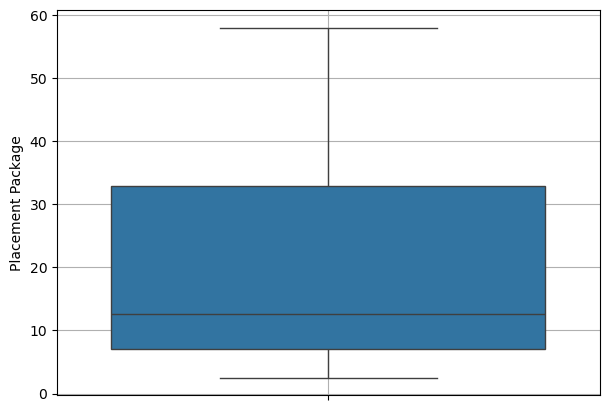

In [10]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df['Placement Package'])
plt.grid()
plt.show()

# NO OUTLIERS IN DATASET

## VISUALIZATION

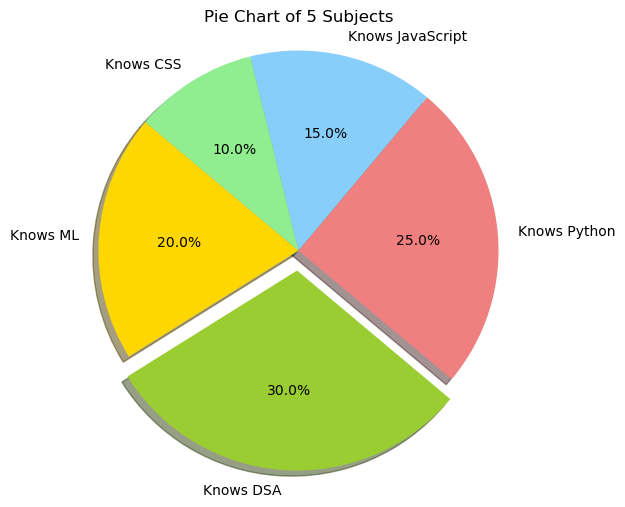

In [11]:
labels = ['Knows ML', 'Knows DSA', 'Knows Python', 'Knows JavaScript', 'Knows CSS']
sizes = [20, 30, 25, 15, 10]  # Example values for each category
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen']
explode = (0, 0.1, 0, 0, 0)  # explode 1st slice for emphasis

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes,explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Pie Chart of 5 Subjects')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
#Observation : Majority percentage of students who knows DSA are getting higher placement package

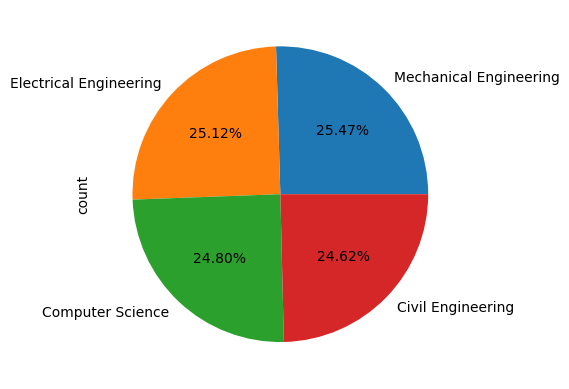

In [14]:
df['Branch of Engineering'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

In [ ]:
# Observation: Majority Percentage of Students which have higher package are from Mechanical Engineering

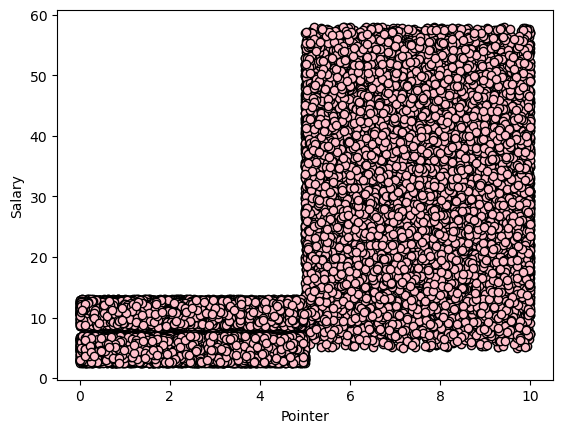

In [15]:
plt.scatter(x=df['CGPA'],y=df['Placement Package'],color='pink',edgecolors='black')
plt.xlabel('Pointer')
plt.ylabel('Salary')
plt.show()

In [ ]:
#Observation :Students who have scored higher CGPA have higher placement package

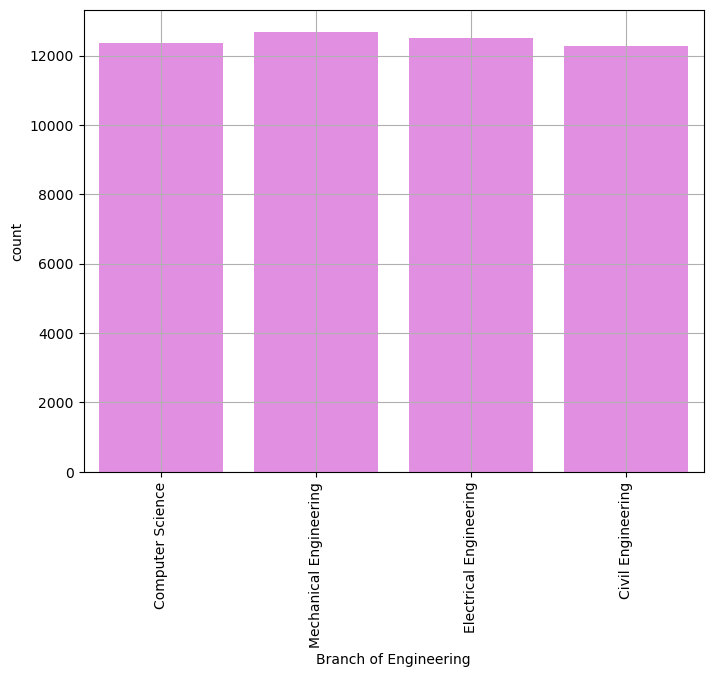

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['Branch of Engineering'],color='violet')
plt.grid()
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Countplot of Branch of Engineering

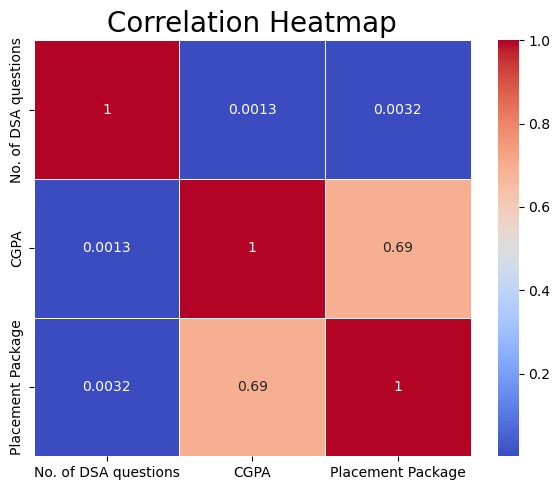

In [17]:
plt.figure(figsize=(6,5))
sns.heatmap(df[['No. of DSA questions','CGPA','Placement Package']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
#Observation : CGPA is Positively Co-related to Placement Package

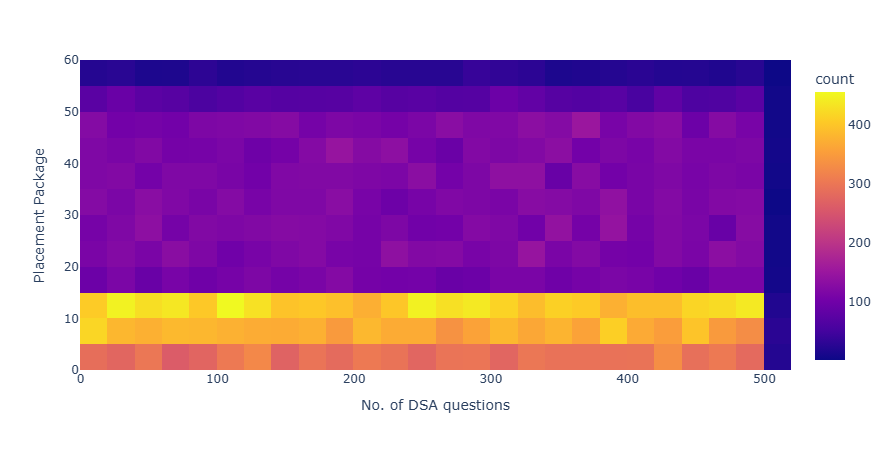

In [19]:
import plotly.express as px
px.density_heatmap(x = 'No. of DSA questions', y = 'Placement Package', 
                   data_frame=df, width=550, height=450)

In [ ]:
#Density map is providing a detailed insight about Placement package based on Number of Questions asked on DSA

 # Separating Numerical & Categorical Data

In [20]:
df.dtypes

No. of DSA questions       int64
CGPA                     float64
Knows ML                  object
Knows DSA                 object
Knows Python              object
Knows JavaScript          object
Knows CSS                 object
Was in Coding Club        object
Age of Candidate           int64
Branch of Engineering     object
Placement Package        float64
dtype: object

In [21]:
df

,No. of DSA questions,CGPA,Knows ML,Knows DSA,Knows Python,Knows JavaScript,Knows CSS,Was in Coding Club,Age of Candidate,Branch of Engineering,Placement Package
0,151,8.52,Yes,Yes,Yes,Yes,Yes,Yes,24,Computer Science,20.01
1,24,1.23,Yes,No,No,Yes,No,Yes,18,Computer Science,10.97
2,333,9.85,No,Yes,Yes,No,No,No,25,Mechanical Engineering,7.51
3,132,1.96,No,No,Yes,No,No,No,20,Computer Science,4.96
4,198,9.73,Yes,Yes,Yes,Yes,Yes,No,21,Electrical Engineering,46.30
...,...,...,...,...,...,...,...,...,...,...,...
54014,362,9.44,Yes,Yes,Yes,No,No,No,18,Civil Engineering,40.07
54015,103,2.59,Yes,Yes,Yes,No,No,Yes,24,Electrical Engineering,12.91
54017,194,4.95,No,No,Yes,No,No,No,19,Computer Science,3.44
54018,449,3.33,No,Yes,No,No,Yes,Yes,20,Computer Science,6.46


# Seperating into Numerical and Categorical columns

In [23]:
# Select numerical columns from the DataFrame
data_num = df.select_dtypes(["int", "float"])

#display the numerical columns
data_num

,No. of DSA questions,CGPA,Age of Candidate,Placement Package
0,151,8.52,24,20.01
1,24,1.23,18,10.97
2,333,9.85,25,7.51
3,132,1.96,20,4.96
4,198,9.73,21,46.30
...,...,...,...,...
54014,362,9.44,18,40.07
54015,103,2.59,24,12.91
54017,194,4.95,19,3.44
54018,449,3.33,20,6.46


# Reset Row index Number of Numerical Column

In [24]:
new_data_num=data_num.reset_index(drop=True, inplace=True)
new_data_num

In [26]:
data_num

,No. of DSA questions,CGPA,Age of Candidate,Placement Package
0,151,8.52,24,20.01
1,24,1.23,18,10.97
2,333,9.85,25,7.51
3,132,1.96,20,4.96
4,198,9.73,21,46.30
...,...,...,...,...
49807,362,9.44,18,40.07
49808,103,2.59,24,12.91
49809,194,4.95,19,3.44
49810,449,3.33,20,6.46


In [27]:
# Select categorical columns from the DataFrame
data_cat = df.select_dtypes(["object"])

#display the numerical columns
data_cat

,Knows ML,Knows DSA,Knows Python,Knows JavaScript,Knows CSS,Was in Coding Club,Branch of Engineering
0,Yes,Yes,Yes,Yes,Yes,Yes,Computer Science
1,Yes,No,No,Yes,No,Yes,Computer Science
2,No,Yes,Yes,No,No,No,Mechanical Engineering
3,No,No,Yes,No,No,No,Computer Science
4,Yes,Yes,Yes,Yes,Yes,No,Electrical Engineering
...,...,...,...,...,...,...,...
54014,Yes,Yes,Yes,No,No,No,Civil Engineering
54015,Yes,Yes,Yes,No,No,Yes,Electrical Engineering
54017,No,No,Yes,No,No,No,Computer Science
54018,No,Yes,No,No,Yes,Yes,Computer Science


# Reset row index number of Categorical Columns

In [30]:
new_data_cat=data_cat.reset_index(drop=True, inplace=True)
new_data_cat

In [31]:
data_cat

,Knows ML,Knows DSA,Knows Python,Knows JavaScript,Knows CSS,Was in Coding Club,Branch of Engineering
0,Yes,Yes,Yes,Yes,Yes,Yes,Computer Science
1,Yes,No,No,Yes,No,Yes,Computer Science
2,No,Yes,Yes,No,No,No,Mechanical Engineering
3,No,No,Yes,No,No,No,Computer Science
4,Yes,Yes,Yes,Yes,Yes,No,Electrical Engineering
...,...,...,...,...,...,...,...
49807,Yes,Yes,Yes,No,No,No,Civil Engineering
49808,Yes,Yes,Yes,No,No,Yes,Electrical Engineering
49809,No,No,Yes,No,No,No,Computer Science
49810,No,Yes,No,No,Yes,Yes,Computer Science


# Label Encoding

In [33]:
# Importing the LabelEncoder from scikit-learn for encoding categorical variables
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder instance
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for i in data_cat:
    data_cat[i] = le.fit_transform(data_cat[i])

# Display the encoded categorical data
data_cat

,Knows ML,Knows DSA,Knows Python,Knows JavaScript,Knows CSS,Was in Coding Club,Branch of Engineering
0,1,1,1,1,1,1,1
1,1,0,0,1,0,1,1
2,0,1,1,0,0,0,3
3,0,0,1,0,0,0,1
4,1,1,1,1,1,0,2
...,...,...,...,...,...,...,...
49807,1,1,1,0,0,0,0
49808,1,1,1,0,0,1,2
49809,0,0,1,0,0,0,1
49810,0,1,0,0,1,1,1


 # Feature Scaling

In [34]:
# Importing StandardScaler from scikit-learn for feature scaling
from sklearn.preprocessing import StandardScaler

In [35]:
# Create an instance of StandardScaler for feature scaling
sc = StandardScaler()

In [36]:
# Scale the numerical features using StandardScaler
x_scaled = sc.fit_transform(data_num)

# Display the scaled numerical features
x_scaled

array([[-0.68190981,  1.21330509,  1.09484706, -0.02208422],
       [-1.55972816, -1.31119563, -1.52922474, -0.60042365],
       [ 0.57606609,  1.67387929,  1.53219236, -0.82177923],
       ...,
       [-0.38469572, -0.02297304, -1.09187944, -1.08215993],
       [ 1.37785292, -0.5839732 , -0.65453414, -0.88895361],
       [ 0.53459435,  0.8566198 , -0.21718884,  1.73916407]])

In [37]:
# Convert the scaled numerical data back to a DataFrame with original column names
data_num = pd.DataFrame(data = x_scaled,columns = data_num.columns)

# Display the DataFrame with scaled numerical features
data_num

,No. of DSA questions,CGPA,Age of Candidate,Placement Package
0,-0.681910,1.213305,1.094847,-0.022084
1,-1.559728,-1.311196,-1.529225,-0.600424
2,0.576066,1.673879,1.532192,-0.821779
3,-0.813237,-1.058399,-0.654534,-0.984917
4,-0.357048,1.632324,-0.217189,1.659834
...,...,...,...,...
49807,0.776513,1.531898,-1.529225,1.261266
49808,-1.013684,-0.840233,1.094847,-0.476311
49809,-0.384696,-0.022973,-1.091879,-1.082160
49810,1.377853,-0.583973,-0.654534,-0.888954


# Concatenating numerical data and categorical data

In [38]:
# Concatenate the scaled numerical features with the categorical data
data_new = pd.concat([data_num,data_cat],axis = 1)

# Display the combined DataFrame with scaled numerical features and label encoded categorical data
data_new

,No. of DSA questions,CGPA,Age of Candidate,Placement Package,Knows ML,Knows DSA,Knows Python,Knows JavaScript,Knows CSS,Was in Coding Club,Branch of Engineering
0,-0.681910,1.213305,1.094847,-0.022084,1,1,1,1,1,1,1
1,-1.559728,-1.311196,-1.529225,-0.600424,1,0,0,1,0,1,1
2,0.576066,1.673879,1.532192,-0.821779,0,1,1,0,0,0,3
3,-0.813237,-1.058399,-0.654534,-0.984917,0,0,1,0,0,0,1
4,-0.357048,1.632324,-0.217189,1.659834,1,1,1,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...
49807,0.776513,1.531898,-1.529225,1.261266,1,1,1,0,0,0,0
49808,-1.013684,-0.840233,1.094847,-0.476311,1,1,1,0,0,1,2
49809,-0.384696,-0.022973,-1.091879,-1.082160,0,0,1,0,0,0,1
49810,1.377853,-0.583973,-0.654534,-0.888954,0,1,0,0,1,1,1


In [39]:
data_new

,No. of DSA questions,CGPA,Age of Candidate,Placement Package,Knows ML,Knows DSA,Knows Python,Knows JavaScript,Knows CSS,Was in Coding Club,Branch of Engineering
0,-0.681910,1.213305,1.094847,-0.022084,1,1,1,1,1,1,1
1,-1.559728,-1.311196,-1.529225,-0.600424,1,0,0,1,0,1,1
2,0.576066,1.673879,1.532192,-0.821779,0,1,1,0,0,0,3
3,-0.813237,-1.058399,-0.654534,-0.984917,0,0,1,0,0,0,1
4,-0.357048,1.632324,-0.217189,1.659834,1,1,1,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...
49807,0.776513,1.531898,-1.529225,1.261266,1,1,1,0,0,0,0
49808,-1.013684,-0.840233,1.094847,-0.476311,1,1,1,0,0,1,2
49809,-0.384696,-0.022973,-1.091879,-1.082160,0,0,1,0,0,0,1
49810,1.377853,-0.583973,-0.654534,-0.888954,0,1,0,0,1,1,1


# Splitting data into X & Y

In [42]:
x_new=data_new.drop('Placement Package', axis=1)
x_new

,No. of DSA questions,CGPA,Age of Candidate,Knows ML,Knows DSA,Knows Python,Knows JavaScript,Knows CSS,Was in Coding Club,Branch of Engineering
0,-0.681910,1.213305,1.094847,1,1,1,1,1,1,1
1,-1.559728,-1.311196,-1.529225,1,0,0,1,0,1,1
2,0.576066,1.673879,1.532192,0,1,1,0,0,0,3
3,-0.813237,-1.058399,-0.654534,0,0,1,0,0,0,1
4,-0.357048,1.632324,-0.217189,1,1,1,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...
49807,0.776513,1.531898,-1.529225,1,1,1,0,0,0,0
49808,-1.013684,-0.840233,1.094847,1,1,1,0,0,1,2
49809,-0.384696,-0.022973,-1.091879,0,0,1,0,0,0,1
49810,1.377853,-0.583973,-0.654534,0,1,0,0,1,1,1


In [46]:
#x_new=data_new.iloc[:,:-1]
y_new=data_new['Placement Package']
y_new

0       -0.022084
1       -0.600424
2       -0.821779
3       -0.984917
4        1.659834
           ...   
49807    1.261266
49808   -0.476311
49809   -1.082160
49810   -0.888954
49811    1.739164
Name: Placement Package, Length: 49812, dtype: float64

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,y_train,y_test=train_test_split(x_new,y_new,train_size=0.80,random_state=42)

In [49]:
X_train.shape

(39849, 10)

In [50]:
X_test.shape

(9963, 10)

In [51]:
y_train.shape

(39849,)

In [52]:
y_test.shape

(9963,)

# Linear Regression Algorithm

In [53]:
from sklearn.linear_model import LinearRegression


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.3, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the R² score, Mean Squared Error (MSE), and Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Convert R² score to percentage
Linearregression_accuracy = r2 * 100

print(f'R² Score: {Linearregression_accuracy:.2f}%')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

R² Score: 53.23%
Mean Squared Error (MSE): 0.4671476526535444
Root Mean Squared Error (RMSE): 0.6834820060934629


# Random Forest Algorithm

In [54]:
#Random forest

from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
random_forest_accuracy= r2_score(y_test, y_pred_rf)*100
print(f'R-squared (Random Forest): {random_forest_accuracy:.2f}%')

R-squared (Random Forest): 66.96%


# Decision Tree Algorithm

In [55]:
#Decision Tree

# Initialize and train the model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

# Evaluate the model
r2_dt = r2_score(y_test, y_pred_dt)*100
print(f'R-squared (Decision Tree): {r2_dt:.2f}%')

R-squared (Decision Tree): 37.51%


# HyperTuning Decision Tree

In [56]:
#Hypertuning decision tree

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# Predict using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
decision_tree_accuracy = r2_score(y_test, y_pred)*100

print("Decision Tree Regressor - Best Model")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {decision_tree_accuracy:.2f}%")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Decision Tree Regressor - Best Model
MAE: 0.35947871354059346
MSE: 0.3086013478598835
RMSE: 0.5555189896483139
R-squared: 69.11%


# K-nearest neighbors Algoritm

In [57]:
#KNN

# Initialize and train the model
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate the model
knn_accuracy = r2_score(y_test, y_pred_knn)*100
print(f'R-squared (KNN): {knn_accuracy:.2f}%')

R-squared (KNN): 54.78%


# Created DataFrame

In [58]:
# Create DataFrame to display accuracies
accuracy_df = pd.DataFrame({
    'Model': ['Linear Regression','Random forest', 'Decision Tree', 'KNN'],
    'Accuracy': [Linearregression_accuracy,random_forest_accuracy,decision_tree_accuracy, knn_accuracy]
})

print(accuracy_df)

               Model   Accuracy
0  Linear Regression  53.233572
1      Random forest  66.964883
2      Decision Tree  69.105736
3                KNN  54.775798


# Conclusion : Decision Tree is the best suited Algorithm for this dataset